<a href="https://colab.research.google.com/github/jsebastianquiroga/DEEP_LEARNING_PUJ/blob/main/taller_dos/traffic_sign_classification_and_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Aprendizaje Profundo.</strong></h1> 
<h2> Para: Ing. Julio Omar Palacio Niño, M.Sc.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Antonio Jose Caicedo.</br></h2>
<h2>Leonardo García.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Taller 2: Traffic Sign Classification and Recognition.</strong></h1> 

En el presente Notebook, se exploraran los datos del data set de Kaggel: https://www.kaggle.com/datasets/wjybuqi/traffic-sign-classification-and-recognition

Este conjunto de datos contiene 6358 etiquetas de categorías etiquetadas manualmente. Las etiquetas incluyen las 10 categorías siguientes: `GuideSign`, `M1`, `M4`, `M5`, `M6`, `M7`, `P1`, `P10_50`, `P12`, `W1`, correspondientes a diez categorías diferentes de señales de tráfico. Todos los datos se han dividido manualmente en conjunto de entrenamiento y conjunto de prueba según la proporción.

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> TBD:. </li>
<li> TBD. </li>
<li> TBD.</li>
</ol>

***

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 89.6 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May  2 03:26:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    44W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f'Number of GPUs available: {len(gpus)}')
    for gpu in gpus:
        print(f'GPU detected: {gpu}')
else:
    print('No GPU detected')

Number of GPUs available: 1
GPU detected: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


## <h1><strong> 1. Cargar el data set: </h1></strong>

El dataset del link en referencia, fue descargado previamente y subido a google drive, para poder cargar el presente notebook sin problemas al momento de cargar la información. </br>

In [5]:
# Conexion a gdrive
# from pydrive.auth import GoogleAuth
# from google.colab import drive
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# twitter = '1gwF2scW3dpklHez9kNws1tlnSrK0XxWU' 


# download = drive.CreateFile({'id': twitter}) 
# download.GetContentFile('gender-classifier-DFE-791531.csv')

In [9]:
# # Set the paths to the training and testing dataset folders
# path_to_folder1 = 'train_dataset/train'
# path_to_folder2 = 'test_dataset/test'

# Set the paths to the training and testing dataset folders (drive)
path_to_folder1 = '/content/drive/MyDrive/aprendizaje_profundo_taller_2/train_dataset/train'
path_to_folder2 = '/content/drive/MyDrive/aprendizaje_profundo_taller_2/test_dataset/test'

# Function to load image paths and labels from a folder
def load_image_paths_and_labels(folder_path):
    image_paths = []  # List to store image paths
    labels = []       # List to store corresponding labels

    # Iterate through each class folder in the given folder_path
    for class_index, class_name in enumerate(os.listdir(folder_path)):
        # Get all JPEG image file paths in the current class folder
        class_image_paths = glob.glob(os.path.join(folder_path, class_name, '*.jpg'))
        # Create a list of class indices, one for each image in the current class folder
        class_labels = [class_index] * len(class_image_paths)
        
        # Extend the image_paths and labels lists with the current class's data
        image_paths.extend(class_image_paths)
        labels.extend(class_labels)

    return image_paths, labels

# Call the function for both training and testing dataset folders
folder1_image_paths, folder1_labels = load_image_paths_and_labels(path_to_folder1)
folder2_image_paths, folder2_labels = load_image_paths_and_labels(path_to_folder2)

# Combine the image paths and labels from both folders into two larger lists
all_image_paths = folder1_image_paths + folder2_image_paths
all_labels = folder1_labels + folder2_labels

# Print the total number of image paths and labels in the combined lists
print("Number of image paths:", len(all_image_paths))
print("Number of labels:", len(all_labels))

Number of image paths: 6348
Number of labels: 6348


In [10]:
# Split the dataset into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(all_image_paths, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

In [11]:
# Define a function to load and preprocess a single image
def load_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size, color_mode="rgb")
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return img_array

In [12]:
# Set the target image size (in pixels) and batch size for data processing
pixel = 224
batch_size = 200
num_classes = len(np.unique(all_labels))

In [13]:
# Create an ImageDataGenerator instance for the training set with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [14]:
# Create an ImageDataGenerator instance for the testing set without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Create instances of the custom data generator for the training and testing sets
train_datagen_instance = train_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'image_path': train_image_paths, 'label': [str(label) for label in train_labels]}), directory=None, x_col='image_path', y_col='label', target_size=(pixel, pixel), class_mode='categorical', batch_size=batch_size)
test_datagen_instance = test_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'image_path': test_image_paths, 'label': [str(label) for label in test_labels]}), directory=None, x_col='image_path', y_col='label', target_size=(pixel, pixel), class_mode='categorical', batch_size=batch_size)

Found 5078 validated image filenames belonging to 10 classes.
Found 1270 validated image filenames belonging to 10 classes.


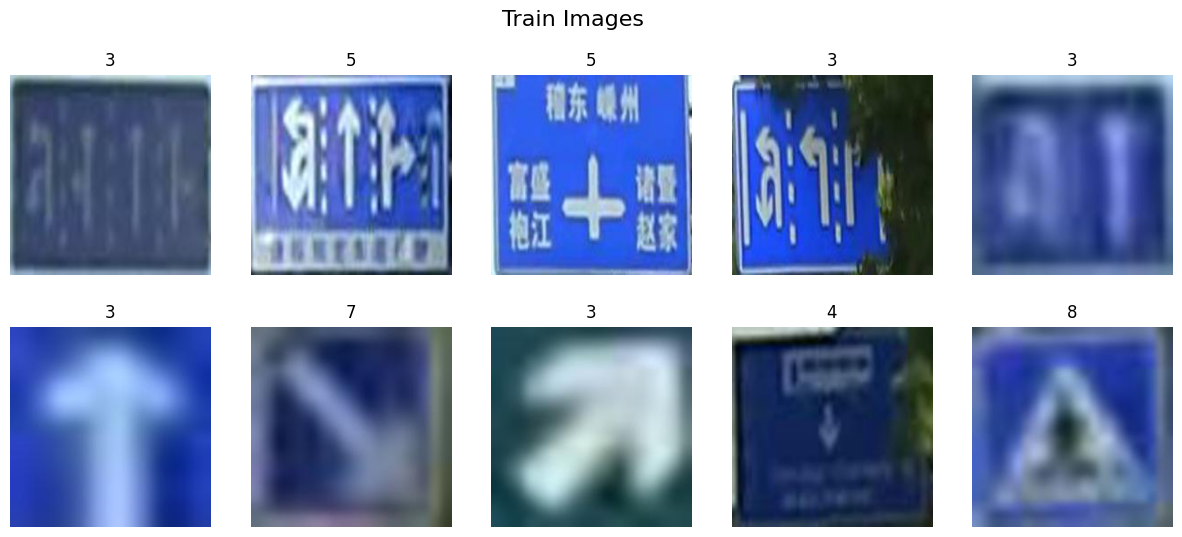

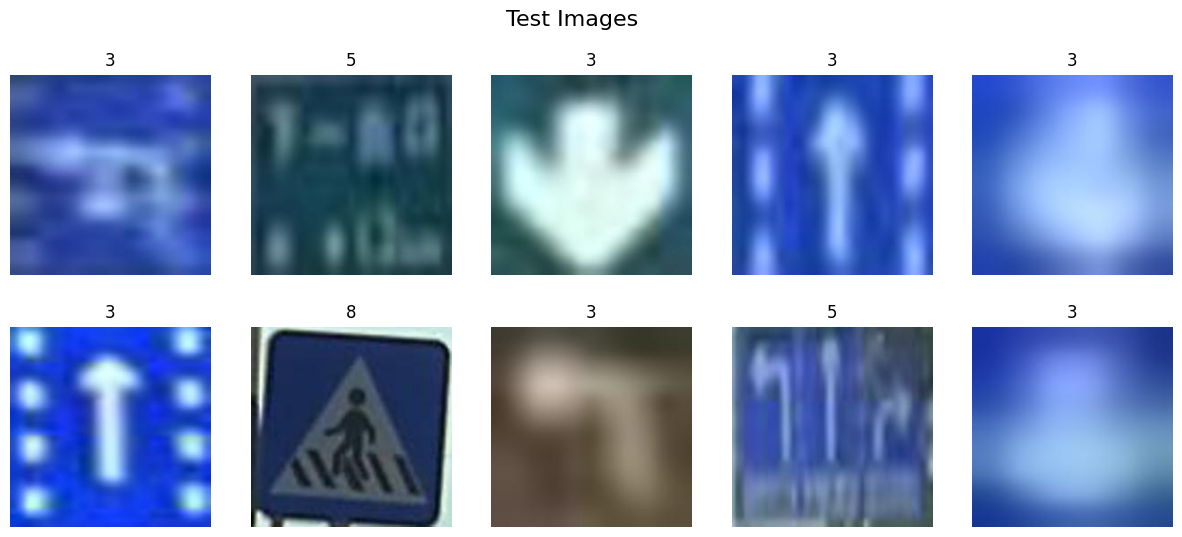

In [16]:
def plot_images(image_paths, labels, title):
    indices = np.random.choice(range(len(image_paths)), 10)
    selected_image_paths = [image_paths[i] for i in indices]
    selected_labels = [labels[i] for i in indices]
    
    images = np.array([img_to_array(load_img(img_path, target_size=(pixel, pixel))) for img_path in selected_image_paths])
    images = images / 255.0
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(selected_labels[i])
        ax.axis('off')

    plt.show()

plot_images(train_image_paths, train_labels, 'Train Images')
plot_images(test_image_paths, test_labels, 'Test Images')

In [17]:
# Define the model
img_height = pixel
img_width = pixel
num_channels = 3

model = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(img_height, img_width, num_channels)),
    MaxPooling2D(pool_size=(5, 5)),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='softmax')
])

# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 44, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 61952)             0         
                                                                 
 dense (Dense)               (None, 100)               6195300   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,198,742
Trainable params: 6,198,742
Non-trainable params: 0
______________________________________________

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
epochs = 20

# Train the model
history = model.fit(
    train_datagen_instance,
    epochs=epochs,
    steps_per_epoch=len(train_image_paths) // batch_size
)

Epoch 1/20
25/25 [==============================] - 3698s 147s/step - loss: 2.4993 - accuracy: 0.4965
Epoch 2/20
25/25 [==============================] - 55s 2s/step - loss: 1.0714 - accuracy: 0.6884
Epoch 3/20
25/25 [==============================] - 54s 2s/step - loss: 0.8886 - accuracy: 0.7347
Epoch 4/20
25/25 [==============================] - 54s 2s/step - loss: 0.8030 - accuracy: 0.7761
Epoch 5/20
25/25 [==============================] - 54s 2s/step - loss: 0.7500 - accuracy: 0.7956
Epoch 6/20
25/25 [==============================] - 54s 2s/step - loss: 0.7110 - accuracy: 0.8112
Epoch 7/20
25/25 [==============================] - 54s 2s/step - loss: 0.6838 - accuracy: 0.8208
Epoch 8/20
25/25 [==============================] - 54s 2s/step - loss: 0.6544 - accuracy: 0.8272
Epoch 9/20
25/25 [==============================] - 54s 2s/step - loss: 0.6736 - accuracy: 0.8180
Epoch 10/20
25/25 [==============================] - 54s 2s/step - loss: 0.6183 - accuracy: 0.8421
Epoch 11/20
25/

In [19]:
test_loss, test_acc = model.evaluate_generator(test_datagen_instance, steps=test_datagen_instance.n // batch_size)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

<ipython-input-19-92954e8d7b0a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_datagen_instance, steps=test_datagen_instance.n // batch_size)


Test loss: 0.5291
Test accuracy: 0.8700


In [21]:
model_save_path = "/content/drive/MyDrive/aprendizaje_profundo_taller_2/my_saved_rnn_model"
os.makedirs(model_save_path, exist_ok=True)  # Create the directory if it doesn't exist
model.save(model_save_path)

In [22]:
from tensorflow.keras.models import load_model

model_save_path = "/content/drive/MyDrive/aprendizaje_profundo_taller_2/my_saved_rnn_model"
loaded_rnn_model = load_model(model_save_path)

In [23]:
test_loss, test_acc = loaded_rnn_model.evaluate(test_datagen_instance)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

7/7 [==============================] - 4s 489ms/step - loss: 0.5233 - accuracy: 0.8709
Test loss: 0.5233
Test accuracy: 0.8709
